In [1]:
import os
import copy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
import scipy 

import seaborn as sns
from IPython.display import Markdown as md

In [2]:
os.chdir('/Users/chenxizhou/Dropbox/code_package/IFlogdensity')
bw_list = [5., 7., 9.]
pen_param_list = [-12., -10., -8.]
kernel_type = 'gaussian_poly2'
contam_data_array = np.arange(2., 410., 4)

In [3]:
stepsize_pd = pd.DataFrame(
    {'bw': [5.0] * 3 + [7.0] * 3 + [9.0] * 3, 
     'logpen': [-8., -10., -12.] * 3, 
     'stepsize': [0.6, 1.0, 1.0, 0.4, 0.6, 0.6, 0.3, 0.5, 0.5]}
)

bw = 5.0, log penalty = -12.0


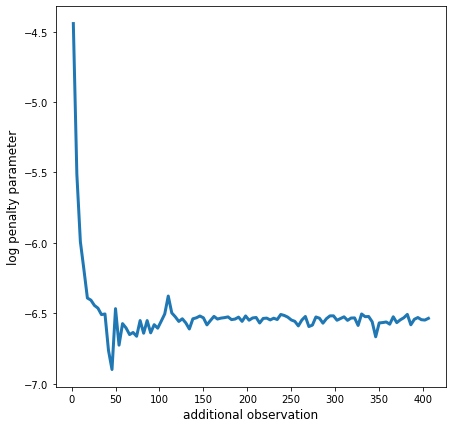

bw = 5.0, log penalty = -10.0


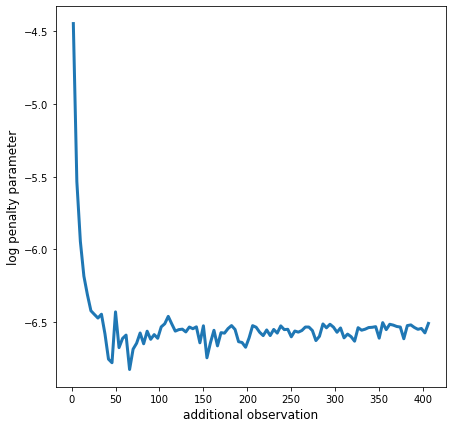

bw = 5.0, log penalty = -8.0


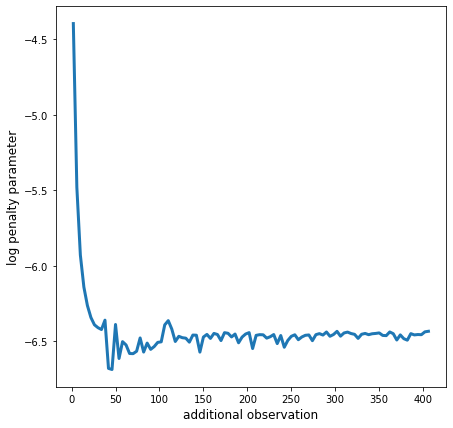

bw = 7.0, log penalty = -12.0


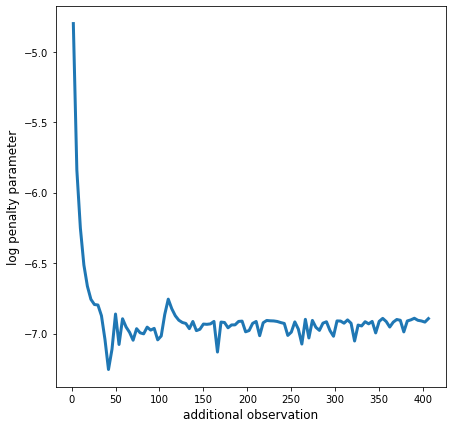

bw = 7.0, log penalty = -10.0


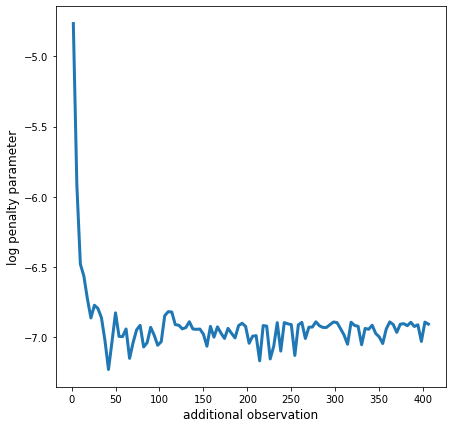

bw = 7.0, log penalty = -8.0


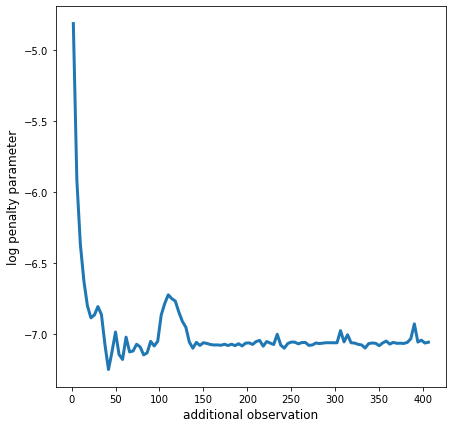

bw = 9.0, log penalty = -12.0


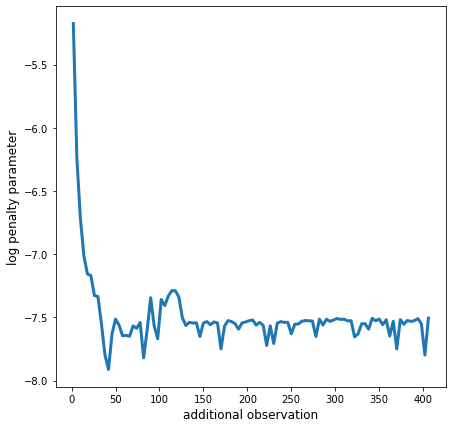

bw = 9.0, log penalty = -10.0


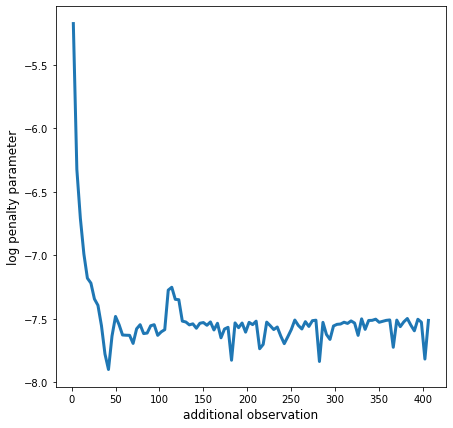

bw = 9.0, log penalty = -8.0


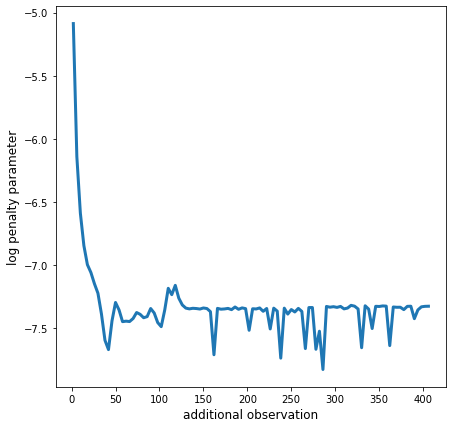

In [5]:
for bw in bw_list: 
    
    for pen_param in pen_param_list: 
        
        print(f'bw = {bw}, log penalty = {pen_param}')
        
        step_size = stepsize_pd[(stepsize_pd.bw == bw) & (stepsize_pd.logpen == pen_param)].loc[:, 'stepsize'].item()
        
        save_dir = (f'data/CalibratedSM-ConstrainedML-basisn=205-bw={bw}-kernel=gaussian_poly2-loglambda={pen_param}-' + 
                    f'contamweight=0.01-plotdomain=(1.0, 410.0)-plotcnts=3000-oriabstol=0.05-' + 
                    f'oristepsize={step_size}-seed=0')
        
        with open(save_dir + '/log.txt') as f:
            lines = f.readlines()
    
        result = []
        for item in lines: 
            result.append(float(item.split('penalty parameter = ')[1].rstrip('\n')))
        
        plt.figure(figsize = (7, 7))
        plt.plot(contam_data_array, np.log(result), color = 'tab:blue', lw = 3.)
        plt.xlabel('additional observation', fontsize = 12)
        plt.ylabel('log penalty parameter', fontsize = 12)
        plt.show()